In [1]:
import numpy as np
from PIL import Image as pim

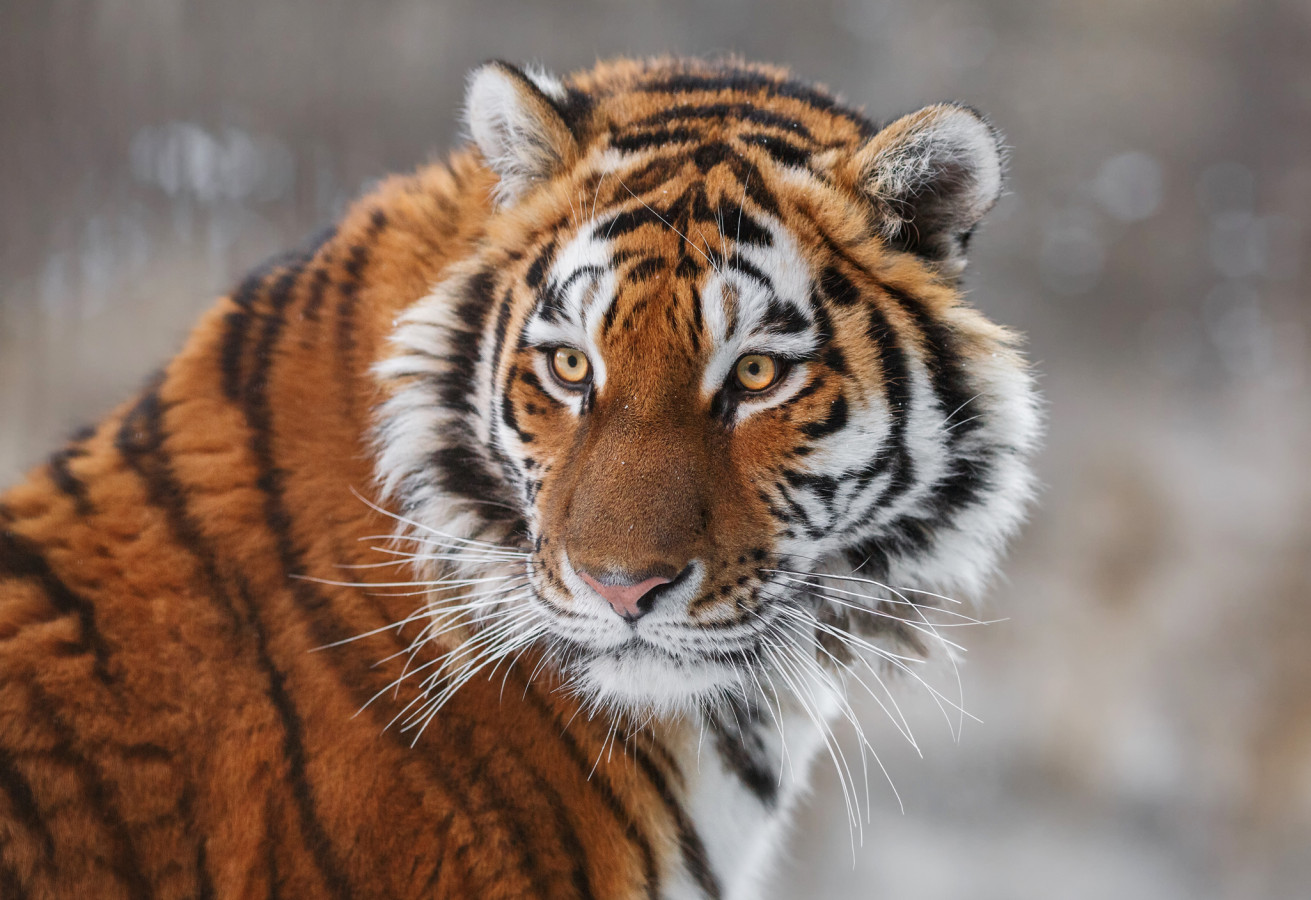

In [2]:
image = pim.open('input/image.png')
image

In [3]:
image = np.array(image)

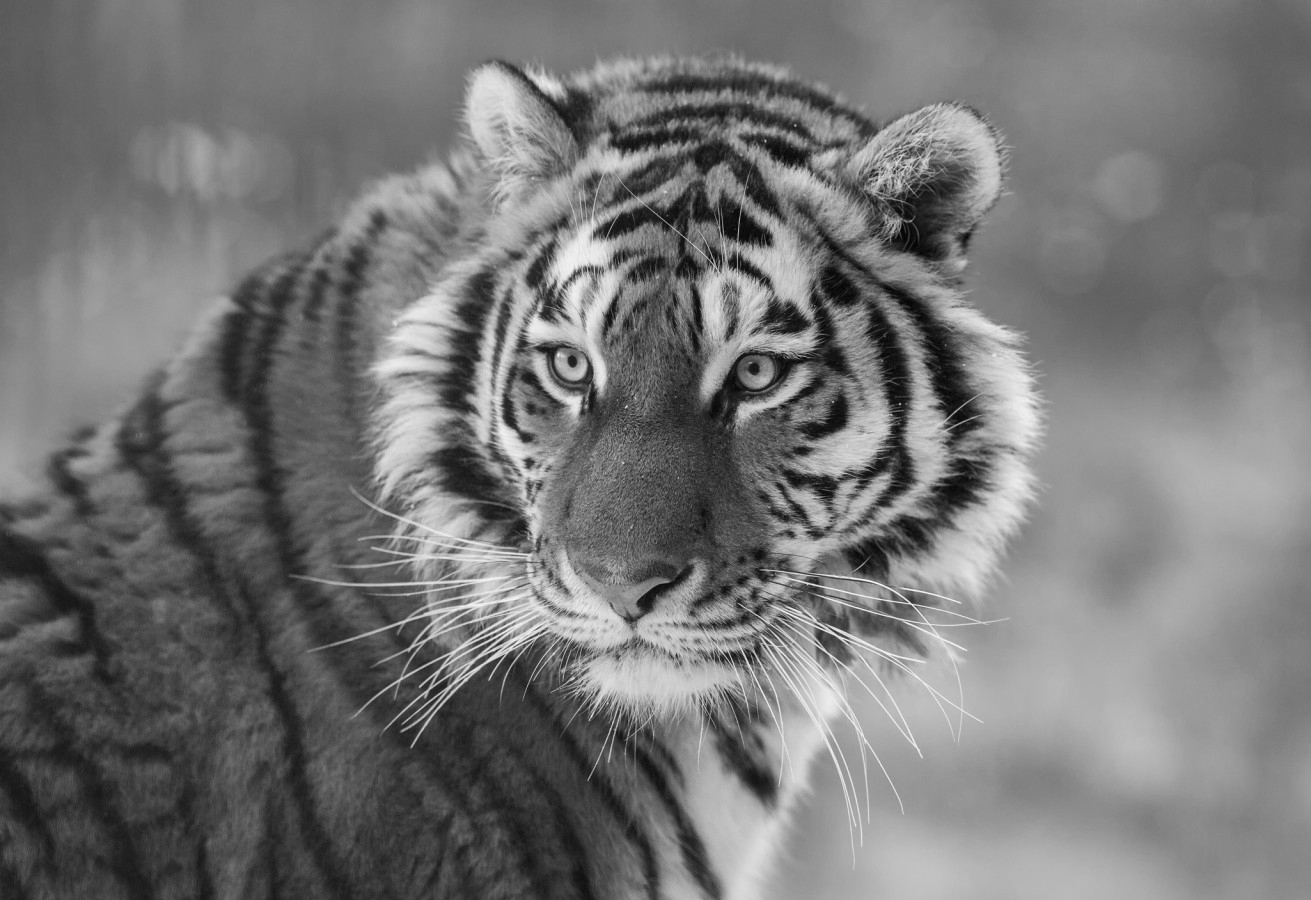

In [4]:
gs_image = (0.3 * image[:, :, 0] + 
            0.59 * image[:, :, 1] + 
            0.11 * image[:, :, 2]).astype('uint8')

pim.fromarray(gs_image)

In [5]:
padding = (1, 1)
padded_image = np.pad(gs_image, padding, 'edge')
padded_height, padded_width = padded_image.shape

padded_height, padded_width

(902, 1313)

In [6]:
ker_x = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
])

ker_y = ker_x.transpose()

In [7]:
def calc_for_neighbors(padded_image, func):
    height, width = padded_image.shape

    res = np.zeros((height - 2, width - 2), dtype=np.int32)

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            block = padded_image[i - 1 : i + 2, j - 1 : j + 2]

            res[i - 1][j - 1] = func(block)

    return (255 * res / np.max(res)).astype(np.uint8)

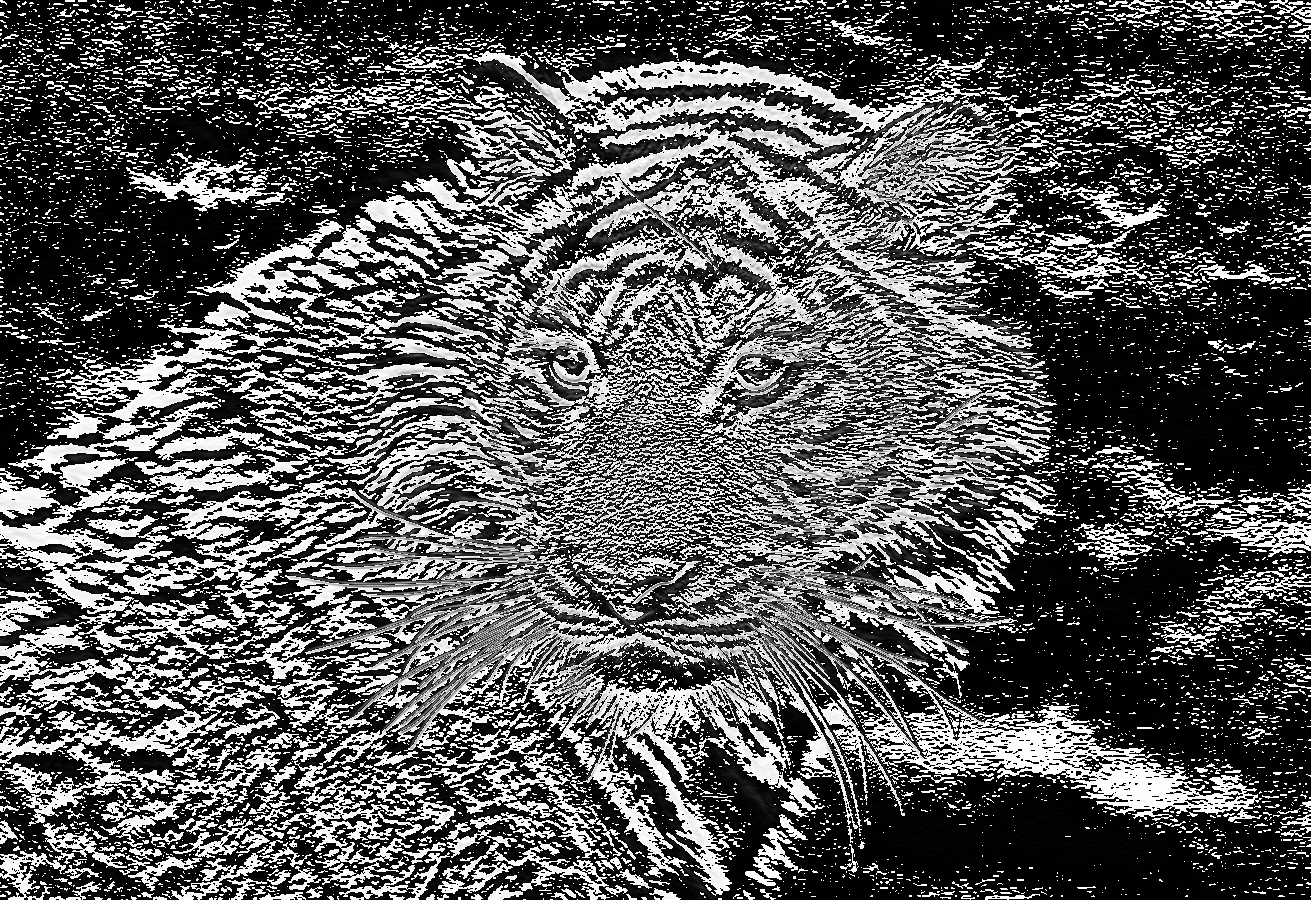

In [8]:
apply_x = lambda block: np.sum(block * ker_x)
x_grad = calc_for_neighbors(padded_image, apply_x)
pim.fromarray(x_grad)

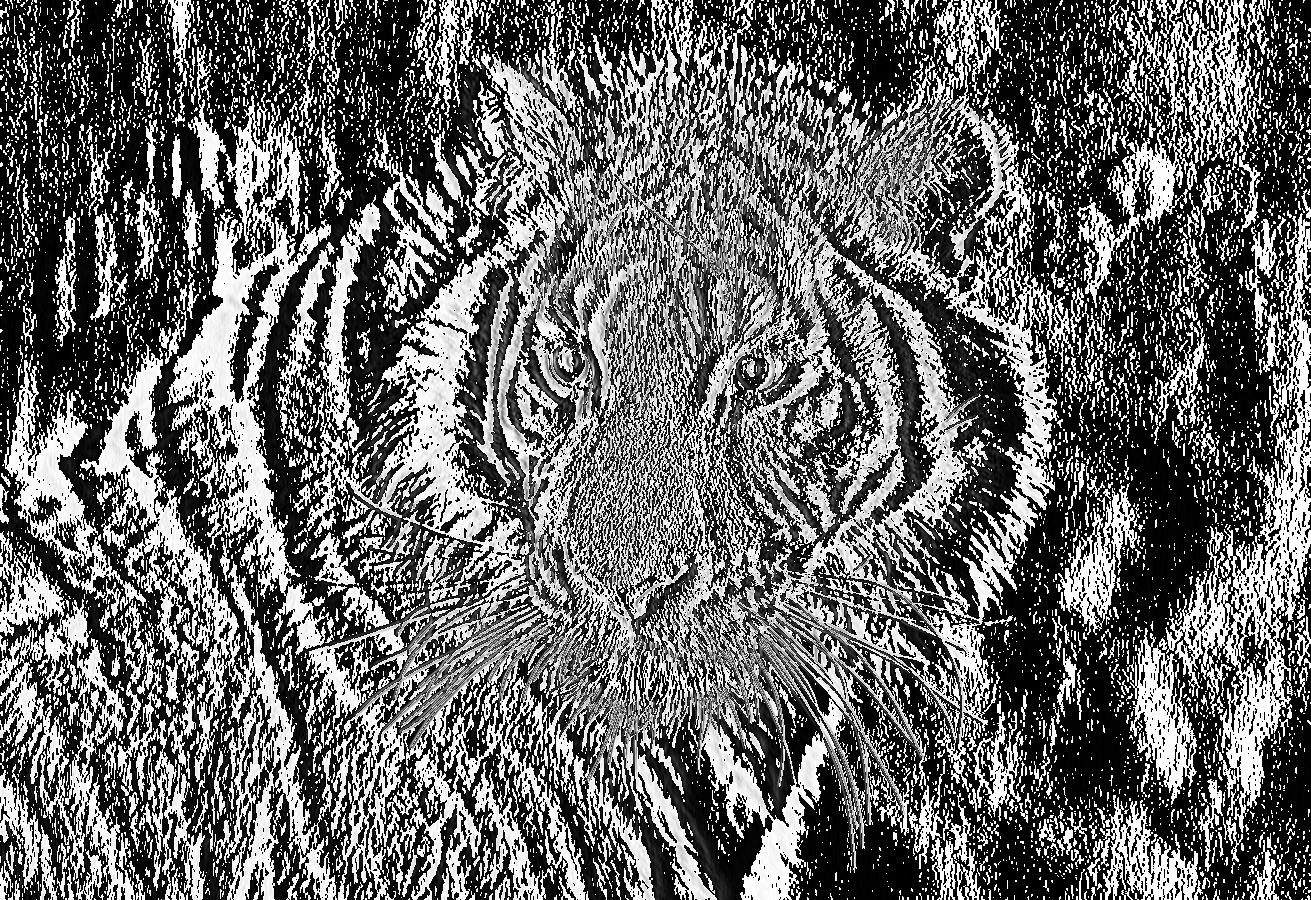

In [9]:
apply_y = lambda block: np.sum(block * ker_y)
y_grad = calc_for_neighbors(padded_image, apply_y)
pim.fromarray(y_grad)

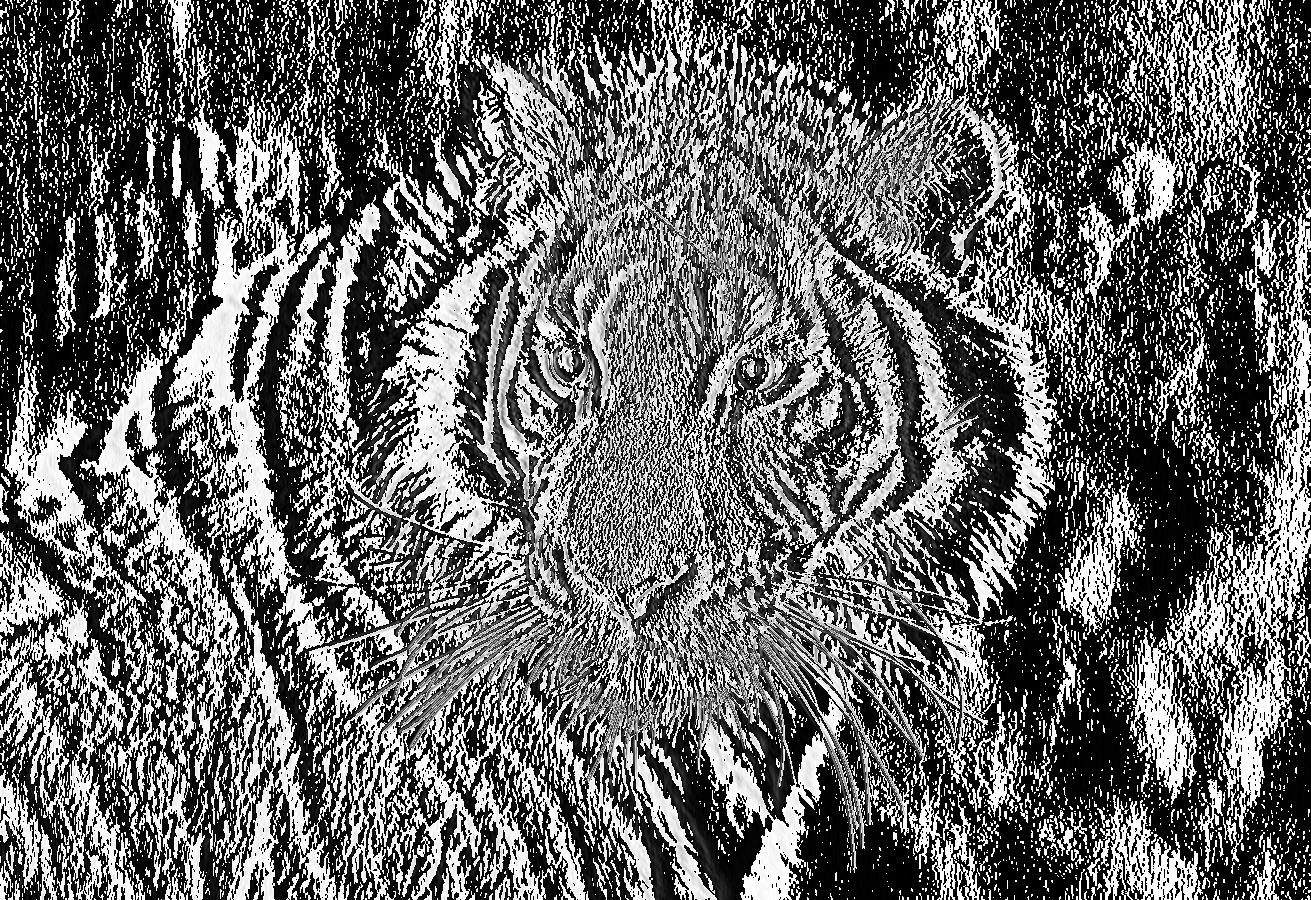

In [10]:
apply_grad = lambda block: np.abs(np.sum(block * ker_x)) + np.abs(np.sum(block * ker_y))
grad = calc_for_neighbors(padded_image, apply_grad)
pim.fromarray(y_grad)

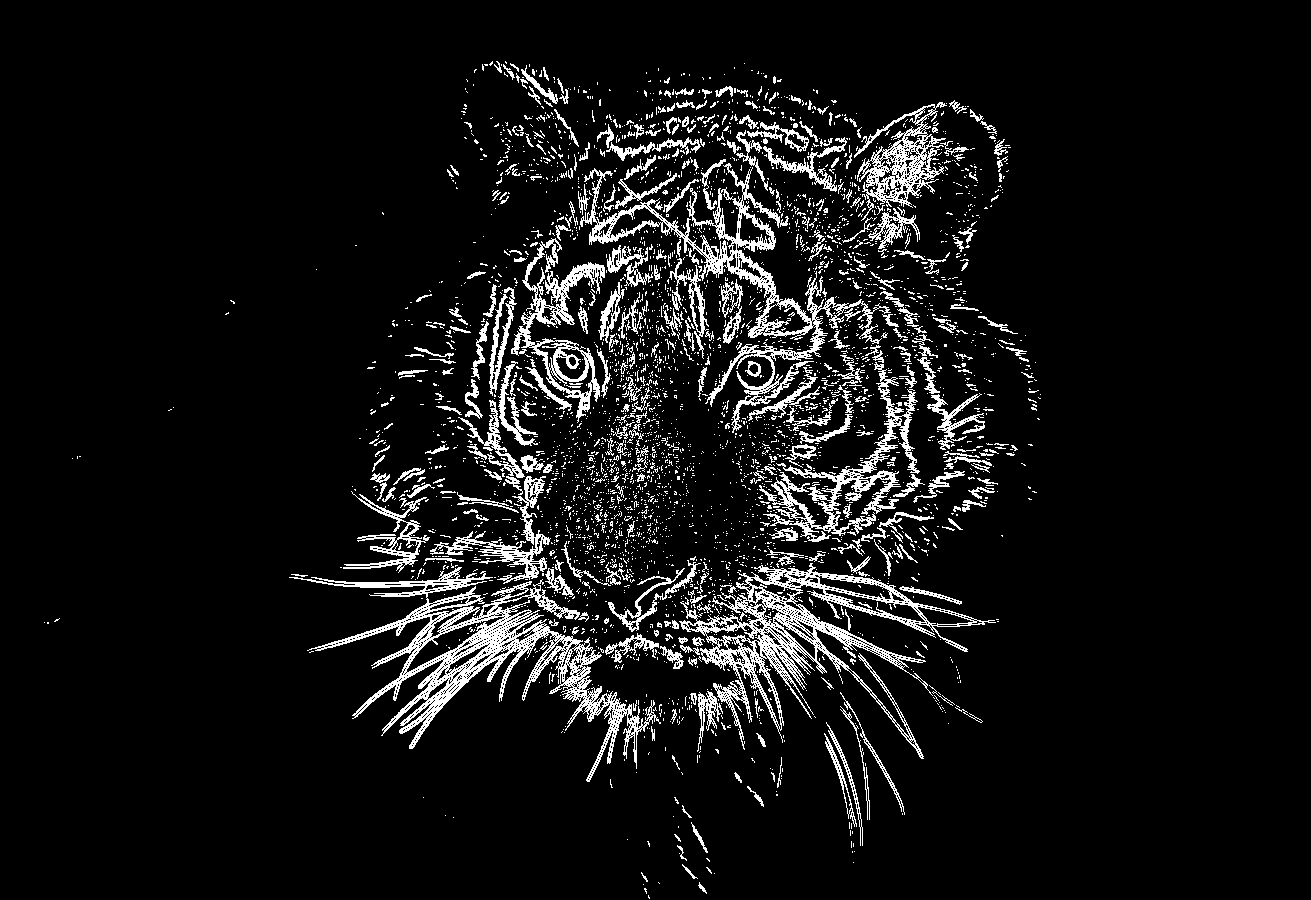

In [18]:
image_edge = ((grad > 40) * 255).astype(np.uint8)
pim.fromarray(image_edge)